In [2]:
from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2
from IPython.display import Image 

Part2

    Q1.

In [3]:
def boxfilter(n):
    assert n%2 == 1, "Dimension must be odd"
    return np.full((n,n), 1.0/(n*n))

In [6]:
boxfilter(3) #test for n = 3

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [7]:
boxfilter(4) #test for n = 4

AssertionError: Dimension must be odd

In [8]:
boxfilter(5) #test for n = 5

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

Q2.

In [3]:
def round_up_to_odd(f):
    return np.ceil(f) // 2 * 2 + 1
def gauss1d(sigma):
    filter_len = round_up_to_odd(6*sigma)
    #get the 1D array
    tempR  = np.arange(np.ceil(filter_len / 2))
    tempL = -np.flip(tempR[1:])
    arr = np.concatenate((tempL, tempR))
    # density function exp(- x^2 / (2*sigma^2))
    x = math.e**(-arr**2/(2*sigma**2))
    #normalize
    x /= np.sum(x)
    return x

In [88]:
gauss1d(0.3)

array([0.00383626, 0.99232748, 0.00383626])

In [89]:
gauss1d(0.5)

array([0.10650698, 0.78698604, 0.10650698])

In [90]:
gauss1d(1)

array([0.00443305, 0.05400558, 0.24203623, 0.39905028, 0.24203623,
       0.05400558, 0.00443305])

In [91]:
gauss1d(2)

array([0.0022182 , 0.00877313, 0.02702316, 0.06482519, 0.12110939,
       0.17621312, 0.19967563, 0.17621312, 0.12110939, 0.06482519,
       0.02702316, 0.00877313, 0.0022182 ])

Q3.

In [4]:
def gauss2d(sigma): 
    # convert 1d to 2d array
    f = gauss1d(sigma)
    f = f[np.newaxis]
    # convolution step
    f = signal.convolve2d(f,f.T)
    return f

In [107]:
gauss2d(0.5)

array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

In [108]:
gauss2d(1)

array([[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [1.76900911e-03, 2.15509428e-02, 9.65846250e-02, 1.59241126e-01,
        9.65846250e-02, 2.15509428e-02, 1.76900911e-03],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05]])

  Q4.

In [9]:
#4a
def convolve2d_manual(array, filter):
    # flip the filter for convolution step
    filter = np.flipud(np.fliplr(filter))
    # get the dimension of the image and the filter
    imaX,imaY = np.shape(array)
    filX,filY = np.shape(filter)
    # get the padding size
    pX = filX//2
    pY = filY//2
    # pad the image(ie the array)
    paddedArr = np.zeros((imaX+ (pX*2),imaY + (pY*2)))
    paddedArr[pX:imaX + pX, pY:imaY + pY] = array
    # calculate the convolution
    retArr = np.zeros((imaX,imaY))
    for i in range(imaX):
        for j in range(imaY):
           retArr[i][j] = (paddedArr[i:i+filX,j:j+filY]*filter).sum()
        
    return retArr

In [10]:
#4b
def gaussconvolve2d_manual(array,sigma):
    #form a filter with given sigma
    filter = gauss2d(sigma)
    # perform convolution
    return convolve2d_manual(array, filter)

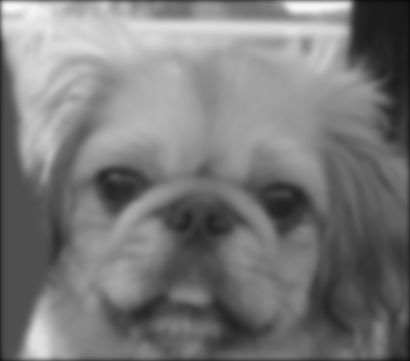

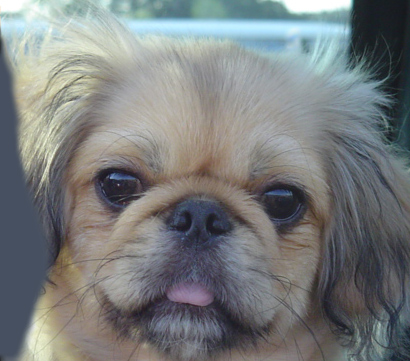

In [93]:
#4c&d
import PIL.Image # the PIL import in the first part doesn't work 
dog_img = PIL.Image.open('dog.jpg')
greyDog = np.asarray(PIL.Image.open('dog.jpg').convert('L'))# convert the image to the greyscale and a numpy array
# greyDog.show()
retDogRaw = gaussconvolve2d_manual(greyDog,3)
retDog = PIL.Image.fromarray(retDogRaw)
if retDog != 'RGB':
    retDog = retDog.convert('RGB')
retDog.save('Q4c.png')

display(retDog)
display(dog_img)

Q5

In [5]:
#5a
def gaussconvolve2d_scipy(array,sigma):
    #generate gaussian 2d filter
    filter = gauss2d(sigma)
    return signal.convolve2d(array,filter,'same')

The reason why we need to different function is that these two functions perform differently. signal.convolve2d 
is for a convolution operation while signal.correlate2d() is for a cross corrolation operation. However, convolution 
in the same as applying the filter of correlation that is mirrod horizontally and vertically.

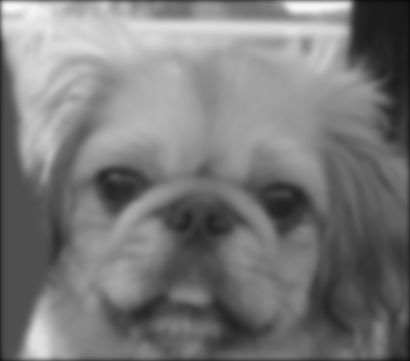

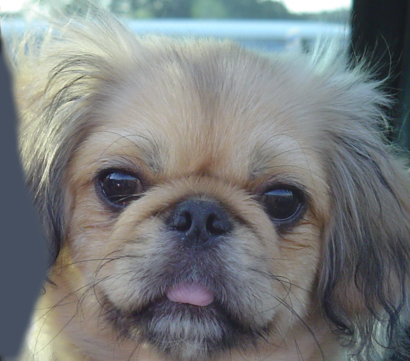

In [91]:
#5b&c -  Continued on 4c
retDogRaw5 = gaussconvolve2d_scipy(greyDog,3)
retDog5 = PIL.Image.fromarray(retDogRaw5)
if retDog5 != 'RGB':
    retDog5 = retDog5.convert('RGB')
retDog5.save('Q5b.png')
display(retDog5)
display(dog_img)

Q6

In [154]:
import time
t1 = time.time() # start timestamp
retDogRaw6 = gaussconvolve2d_manual(greyDog,10)
durationM = time.time() - t1 # duration in seconds
t2 = time.time() # start timestamp
retDogRaw6 = gaussconvolve2d_scipy(greyDog,10)
durationS = time.time() - t2 # duration in seconds

print(durationM)#1.4560658931732178
print(durationS)#1.0713632106781006

1.5754480361938477
1.1717109680175781


The runtime of the gaussconvolve2d_scipy is faster than gaussconvolve2d_manual,

The reason why the scipy function runs faster is that it uses just a matrix multiplication, instead of insertions into a matrix and with atithmetic computations.

Q7

We can seperate the 2D Gaussian filter into two 1D Gaussian filter array, then do the calculation seperately on the 
respective Gaussian 1D array and combine to see the result (due to Gaussian seperability).

The reason why this approach will be faster is that, in the original implementation, we calculate with two 2D array, which has $m^2n^2$ operations (m is the filter size, n is the image size). However, after seperating the Gaussian filter, we only need to take $2mn^2$ operations.

Part3

Q1

In [79]:
def blurredLow(sigma,img):
    imgArr = np.asarray(img)
    b, g, r  = imgArr[:, :, 0], imgArr[:, :, 1], imgArr[:, :, 2] # For RGB image
    # use sigma to act on each channel for the blur effect
    b = gaussconvolve2d_scipy(b, sigma)
    g = gaussconvolve2d_scipy(g, sigma)
    r = gaussconvolve2d_scipy(r, sigma)
    # combine back to a image
    zipped = np.dstack((b, g, r))
    zipped = zipped.astype('uint8')
    retImg = PIL.Image.fromarray(zipped)
    if retImg != 'RGB':
        retImg = retImg.convert('RGB')
    return retImg

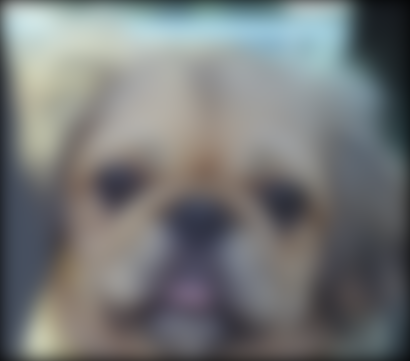

In [90]:
dog_img = PIL.Image.open('0b_dog.bmp')
Part3_1 = blurredLow(10,dog_img)
Part3_1.save('Part3_1.png')
display(Part3_1)

Q2

In [14]:
def blurredHigh(sigma,img):
    # get the low frequency image
    imgArr = np.asarray(img)
    b, g, r  = imgArr[:, :, 0], imgArr[:, :, 1], imgArr[:, :, 2] # For RGB image
    scaledb = (b >= 0).all() and (b <= 1).all()
    scaledg = (g >= 0).all() and (g <= 1).all()
    scaledr = (r >= 0).all() and (r <= 1).all()
    # use sigma to act on each channel for the blur effect
    bf = gaussconvolve2d_scipy(b, sigma)
    gf = gaussconvolve2d_scipy(g, sigma)
    rf = gaussconvolve2d_scipy(r, sigma)
    # subtracted by the original
    b = np.subtract(b,bf)
    g = np.subtract(g,gf)
    r = np.subtract(r,rf)
    # combine back to a image
    zipped = np.dstack((b, g, r))
    # visualization
    if (scaledb and scaledg and scaledr):
        zipped += 0.5
    else:
        zipped += 128
    
    zipped = zipped.astype('uint8')
    retImg = PIL.Image.fromarray(zipped)
    
    return retImg

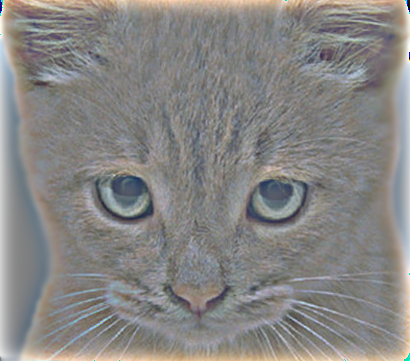

In [89]:
cat_img = PIL.Image.open('0a_cat.bmp')
Part3_2 = blurredHigh(10,cat_img)
display(Part3_2)
Part3_2.save('Part3_2.png')

In [75]:
def mixedImg(sigma,imgH,imgL):
    imgArrH = np.asarray(imgH)
    imgArrL = np.asarray(imgL)
    bH, gH, rH  = imgArrH[:, :, 0], imgArrH[:, :, 1], imgArrH[:, :, 2] # For RGB image
    bL, gL, rL  = imgArrL[:, :, 0], imgArrL[:, :, 1], imgArrL[:, :, 2] # For RGB image
    # use sigma to act on each channel for the blur effect and get low blur
    bfH = gaussconvolve2d_scipy(bH, sigma)
    gfH = gaussconvolve2d_scipy(gH, sigma)
    rfH = gaussconvolve2d_scipy(rH, sigma)
    
    bfL = gaussconvolve2d_scipy(bL, sigma)
    gfL = gaussconvolve2d_scipy(gL, sigma)
    rfL = gaussconvolve2d_scipy(rL, sigma)
    # subtracted by the original to get high blur
    b1 = np.subtract(bH,bfH)
    g1 = np.subtract(gH,gfH)
    r1 = np.subtract(rH,rfH)
    
    # Mix high and low
    bret = np.add(b1,bfL)
    gret = np.add(g1,gfL)
    rret = np.add(r1,rfL)
    # combine back to a image
    zipped = np.dstack((bret, gret, rret))
    
    zipped = zipped.astype('uint8')
    
    #remove artifacts
    retImg = PIL.Image.fromarray(np.clip(zipped, 0, 255))
    return retImg

In [88]:
#Demo on three sets on images with sigma = 7,8,9

#1.Cat and Dog
mixed1 = mixedImg(3,cat_img,dog_img)
mixed1.show()
mixed1.save('catDogmixed_sigma=3.png')
mixed1 = mixedImg(6,cat_img,dog_img)
mixed1.show()
mixed1.save('catDogmixed_sigma=6.png')
mixed1 = mixedImg(9,cat_img,dog_img)
mixed1.show()
mixed1.save('catDogmixed_sigma=9.png')

bicecle_img = PIL.Image.open('1a_bicycle.bmp')
mortor_img = PIL.Image.open('1b_motorcycle.bmp')
mixed2 = mixedImg(3,bicecle_img,mortor_img)
mixed2.show()
mixed2.save('bymor_sigma=3.png')
mixed2 = mixedImg(6,bicecle_img,mortor_img)
mixed2.show()
mixed2.save('bymor_sigma=6.png')
mixed2 = mixedImg(9,bicecle_img,mortor_img)
mixed2.show()
mixed2.save('bymor_sigma=9.png')


ein_img = PIL.Image.open('2a_einstein.bmp')
mar_img = PIL.Image.open('2b_marilyn.bmp')
mixed3 = mixedImg(3,ein_img,mar_img)
mixed3.show()
mixed3.save('einmar_sigma=3.png')
mixed3 = mixedImg(6,ein_img,mar_img)
mixed3.show()
mixed3.save('einmar_sigma=6.png')
mixed3 = mixedImg(9,ein_img,mar_img)
mixed3.show()


Part4

Q1 in another file

In [ ]:
Q2:
    
    
The Gausian filter smoothes the image
THe mean filter smoothes the noise more directly and clearyly
The bilieteral filter works best when image has more border(like stripes imeage)